## Project By:
* Saad Bin Shaheen
* Muhammad Umer Adeeb

## Title:
Crack Type Classification in ASTM A615 Steel Billet Macro Samples Using Deep Learning.

## Objective:
The objective of this project is to develop a deep learning-based image classification model that can automatically detect and classify three types of cracks—transverse, longitudinal, and diagonal—in macro-etched images of ASTM A615 steel billets. This aims to enhance the quality control process in steel manufacturing.

## Background:
ASTM A615 is a standard specification for deformed and plain carbon-steel bars used in concrete reinforcement. During the production of steel billets, defects such as cracks may form due to various factors like thermal stress, mechanical deformation, or casting irregularities. These cracks—especially if undetected—can compromise structural integrity and safety in downstream applications. Currently, visual inspection by metallurgists or operators is time-consuming and prone to human error. Deep learning presents an efficient alternative by automating defect detection with high accuracy.

## Dataset:
We have collected 184 images of macro-etched steel billet samples, prepared according to metallurgical standards. We have also performed data augmentation using roboflow which results in 432 images. Each image has been labeled based on the type of visible crack using roboflow:

* Transverse crack

* Longitudinal crack

* Diagonal crack

In [1]:
# installing ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

In [4]:
# installing roboflow package as we have labeled images using roboflow.com
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [5]:
# importing images with annotation using API key
from roboflow import Roboflow
rf = Roboflow(api_key="qCir43lAIy154SGLf3w6")
project = rf.workspace("billet-defect-detection").project("billet-inspection")
version = project.version(5)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BILLET-INSPECTION-5 in yolov11:: 100%|██████████| 876/876 [00:00<00:00, 5874.50it/s]


In [6]:
import os

# Specify the path to the training image directory
train_image_dir = '/content/BILLET-INSPECTION-5/train/images'

# Check if the directory exists
if os.path.exists(train_image_dir):
  # Count the number of files in the directory
  num_images_train = len([f for f in os.listdir(train_image_dir) if os.path.isfile(os.path.join(train_image_dir, f))])
  print(f"Number of images in the training set: {num_images_train}")
else:
  print(f"Training image directory not found at: {train_image_dir}")


# Specify the path to the validation image directory
valid_image_dir = '/content/BILLET-INSPECTION-5/valid/images'

# Check if the directory exists
if os.path.exists(valid_image_dir):
  # Count the number of files in the directory
  num_images_valid = len([f for f in os.listdir(valid_image_dir) if os.path.isfile(os.path.join(valid_image_dir, f))])
  print(f"Number of images in the validation set: {num_images_valid}")
else:
  print(f"Validation image directory not found at: {valid_image_dir}")



# Specify the path to the test image directory
test_image_dir = '/content/BILLET-INSPECTION-5/test/images'

# Check if the directory exists
if os.path.exists(test_image_dir):
  # Count the number of files in the directory
  num_images_test = len([f for f in os.listdir(test_image_dir) if os.path.isfile(os.path.join(test_image_dir, f))])
  print(f"Number of images in the test set: {num_images_test}")
else:
  print(f"Test image directory not found at: {test_image_dir}")

Number of images in the training set: 378
Number of images in the validation set: 37
Number of images in the test set: 17


In [7]:
dataset.location

'/content/BILLET-INSPECTION-5'

In [8]:
# Train YOLO11 Model
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 117MB/s]
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BILLET-INSPECTION-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

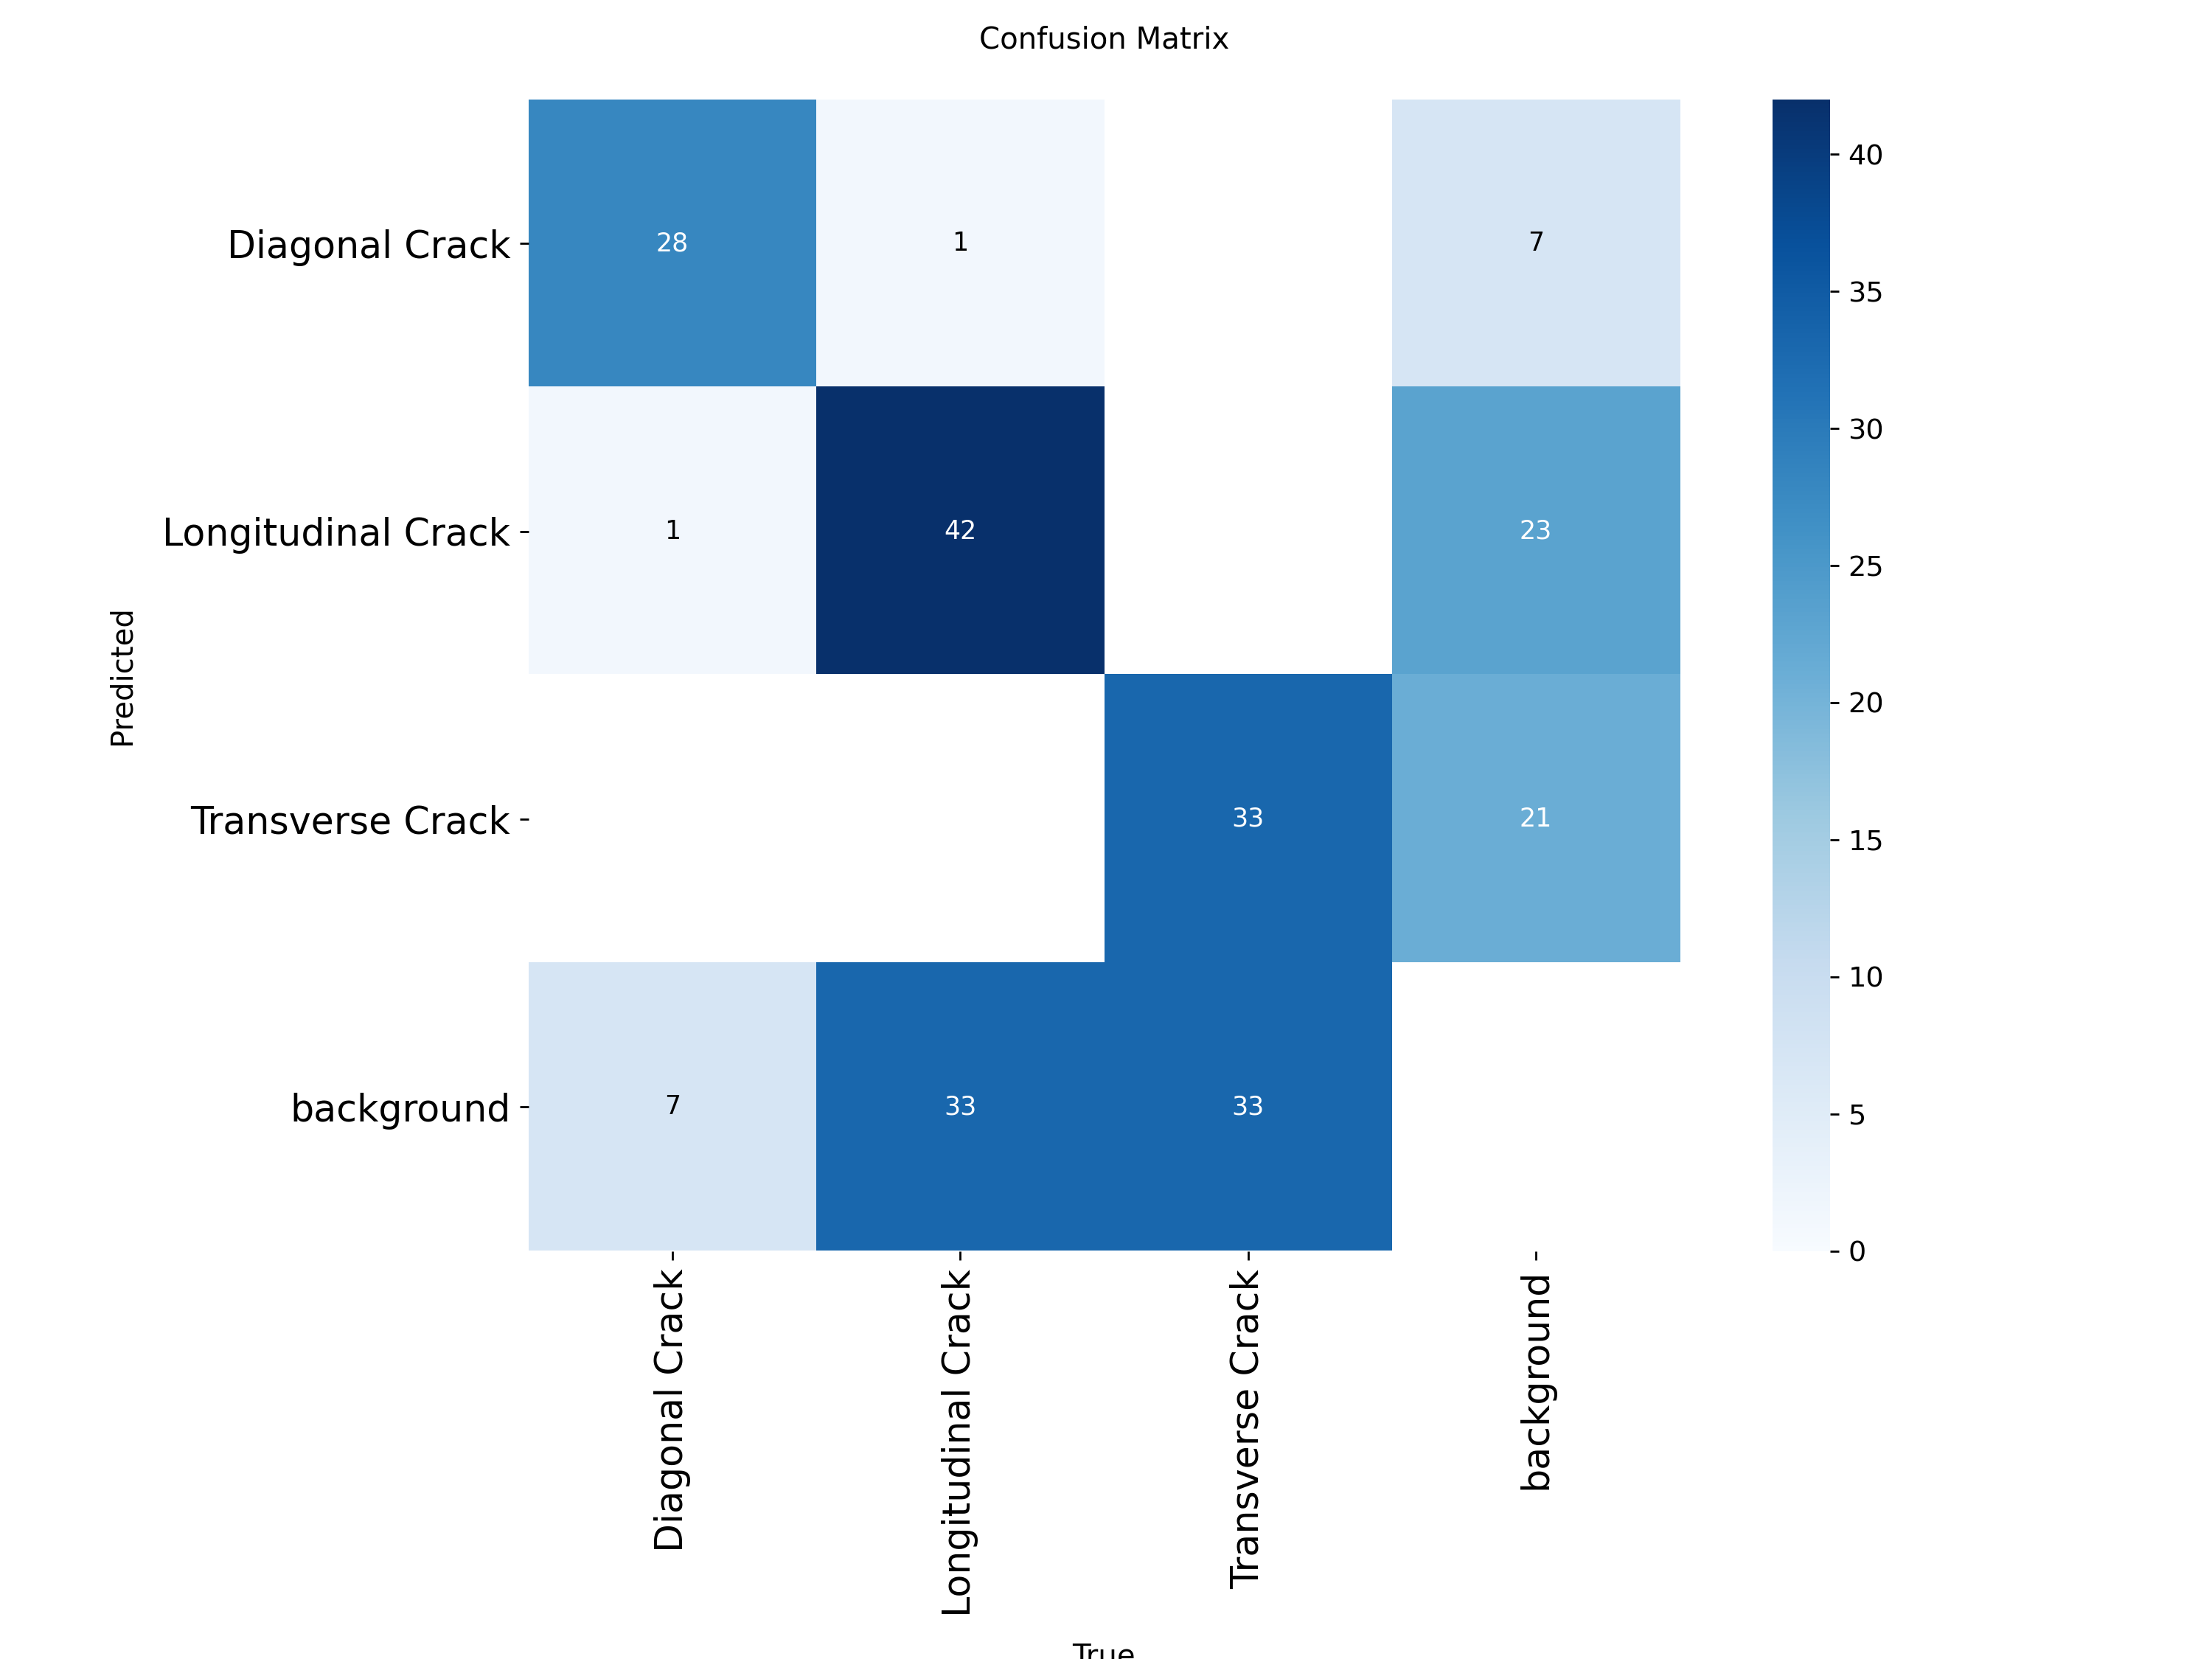

In [9]:
# Examine Training Results
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

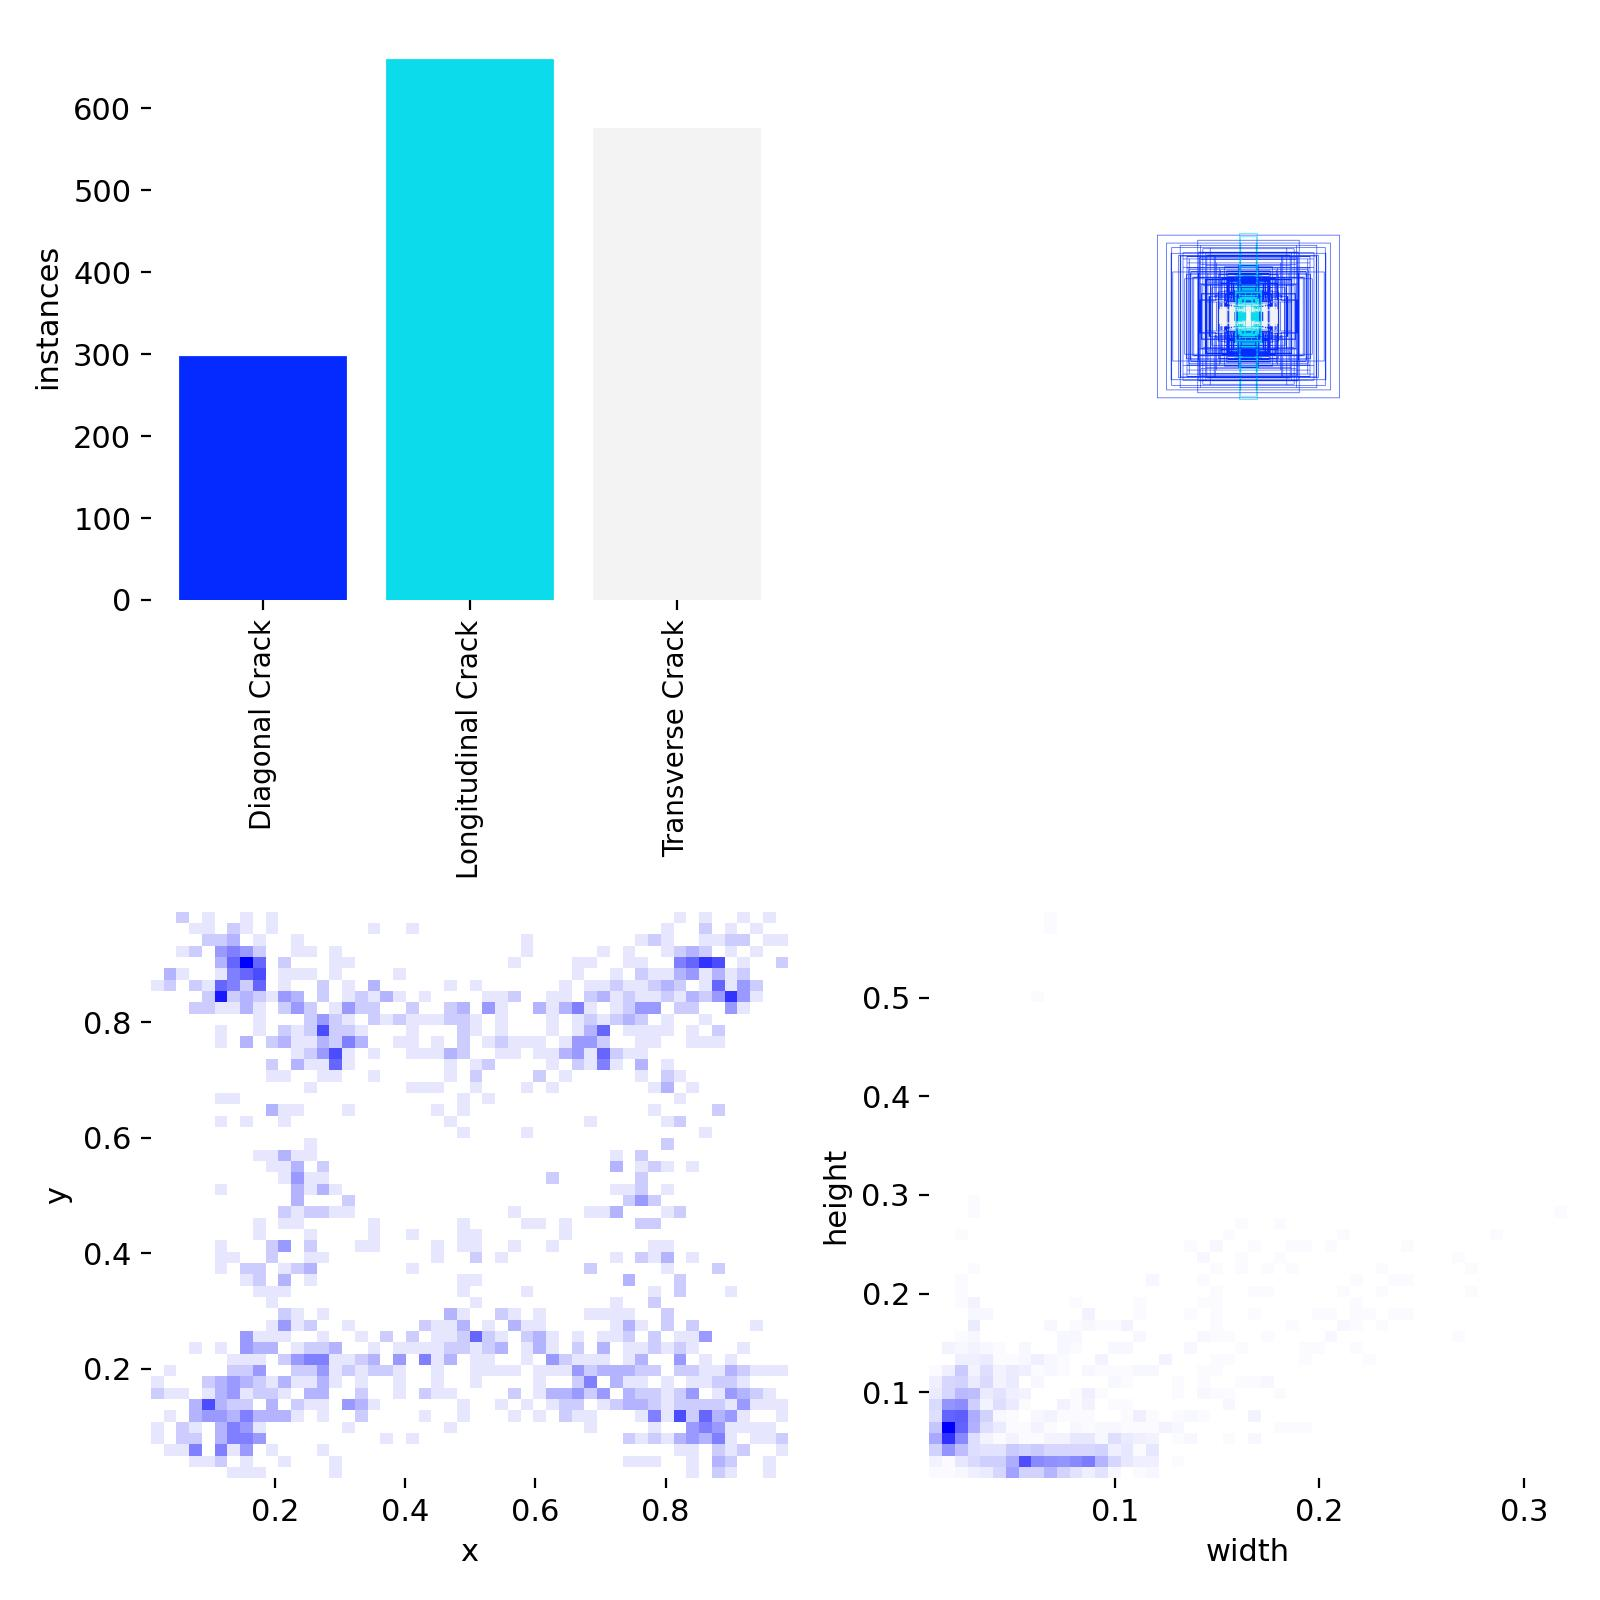

In [10]:
Image("/content/runs/detect/train/labels.jpg", width=600)

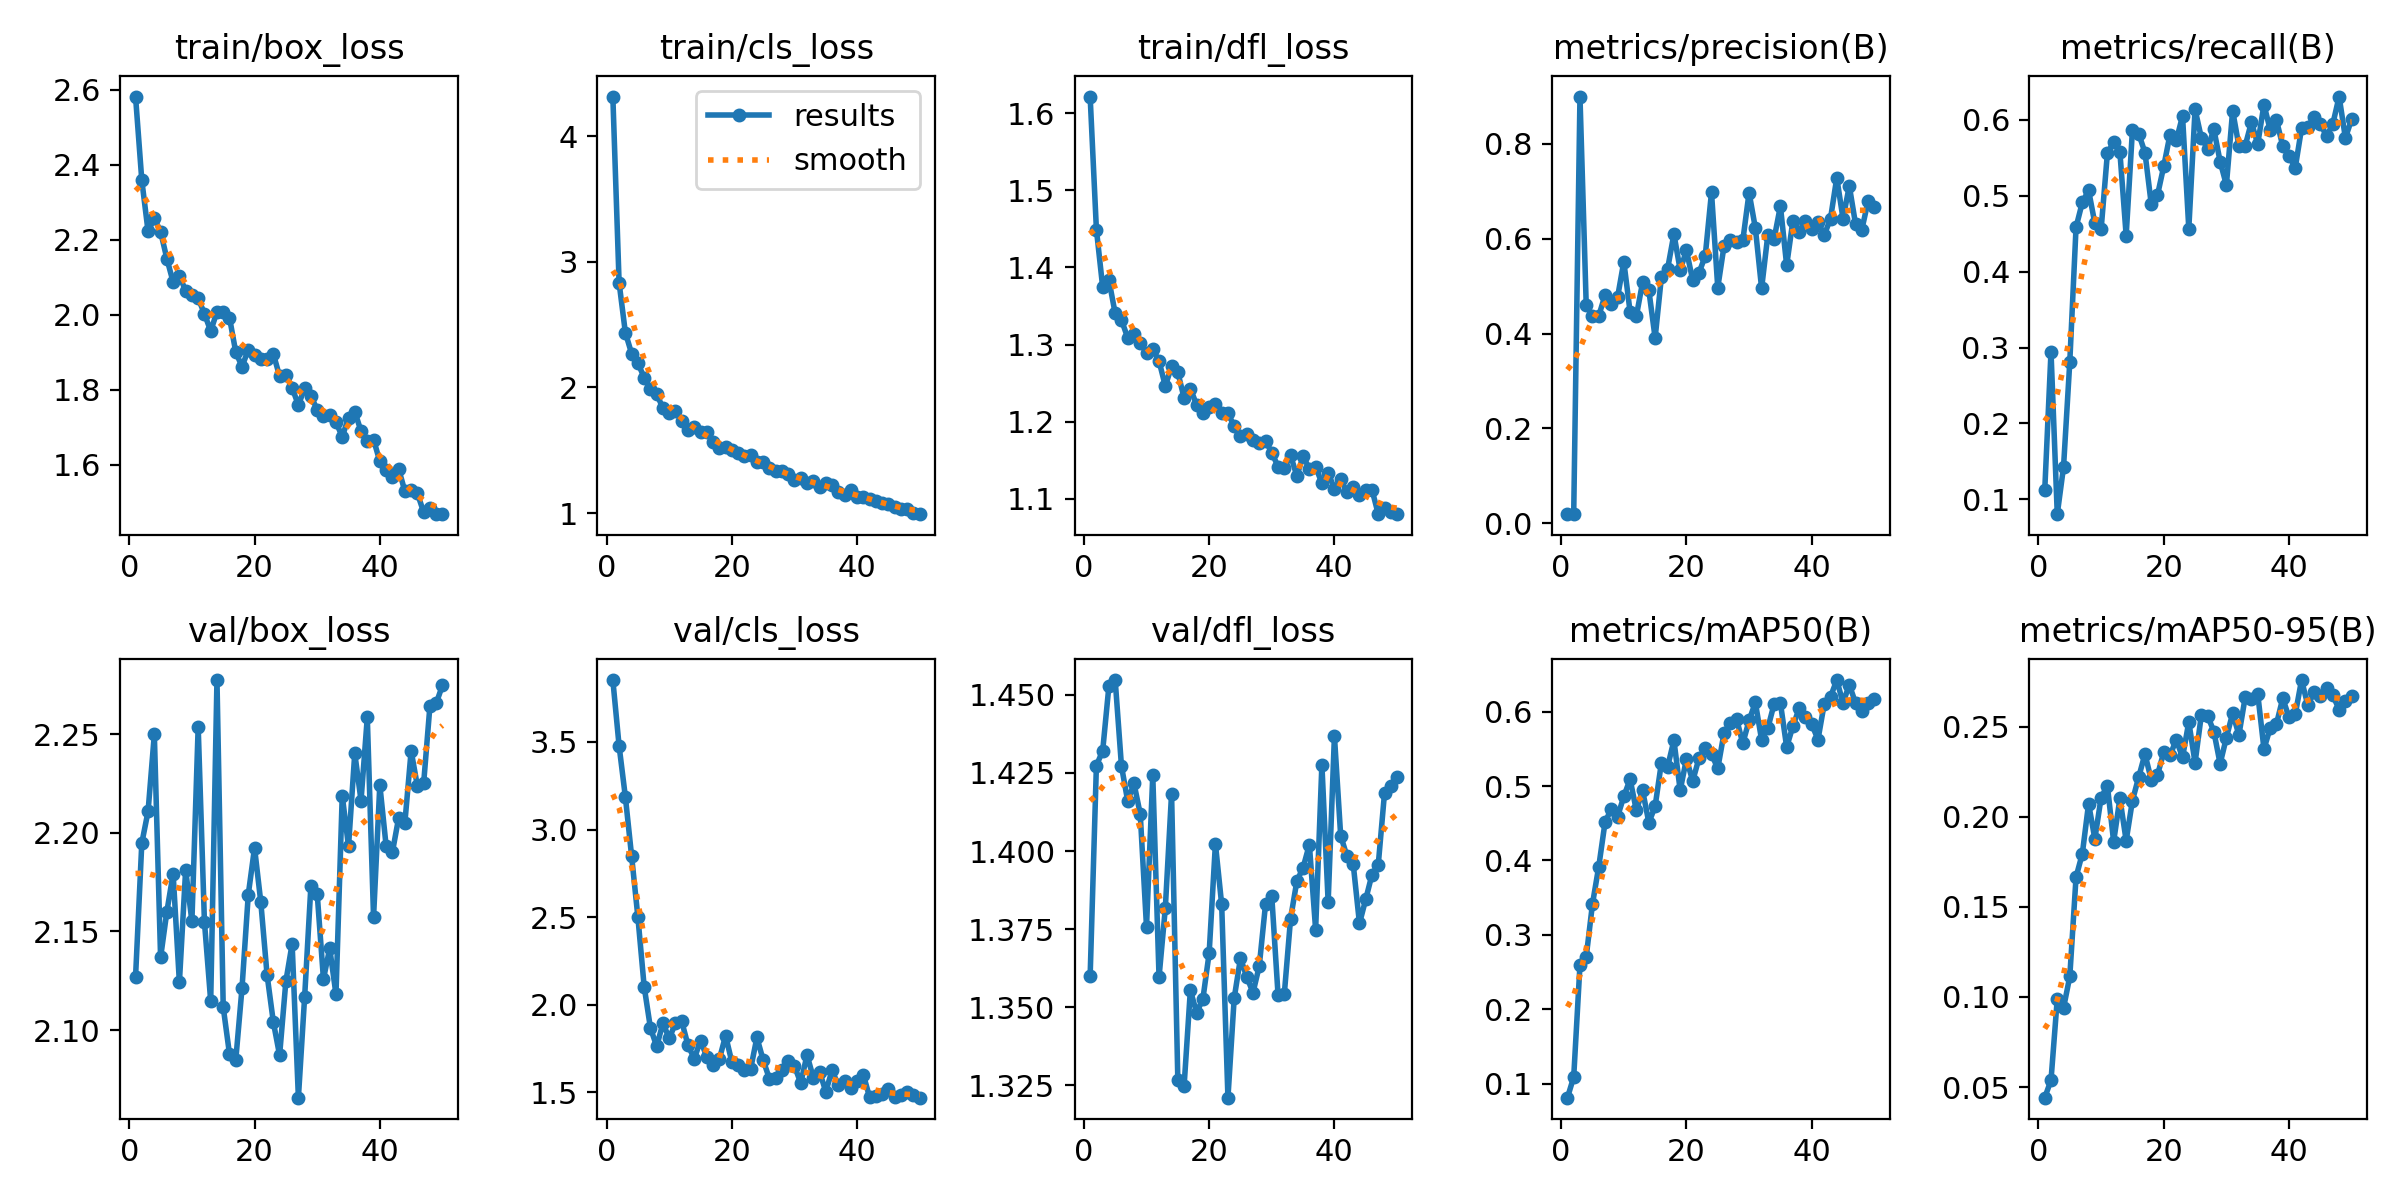

In [11]:
Image("/content/runs/detect/train/results.png", width=600)

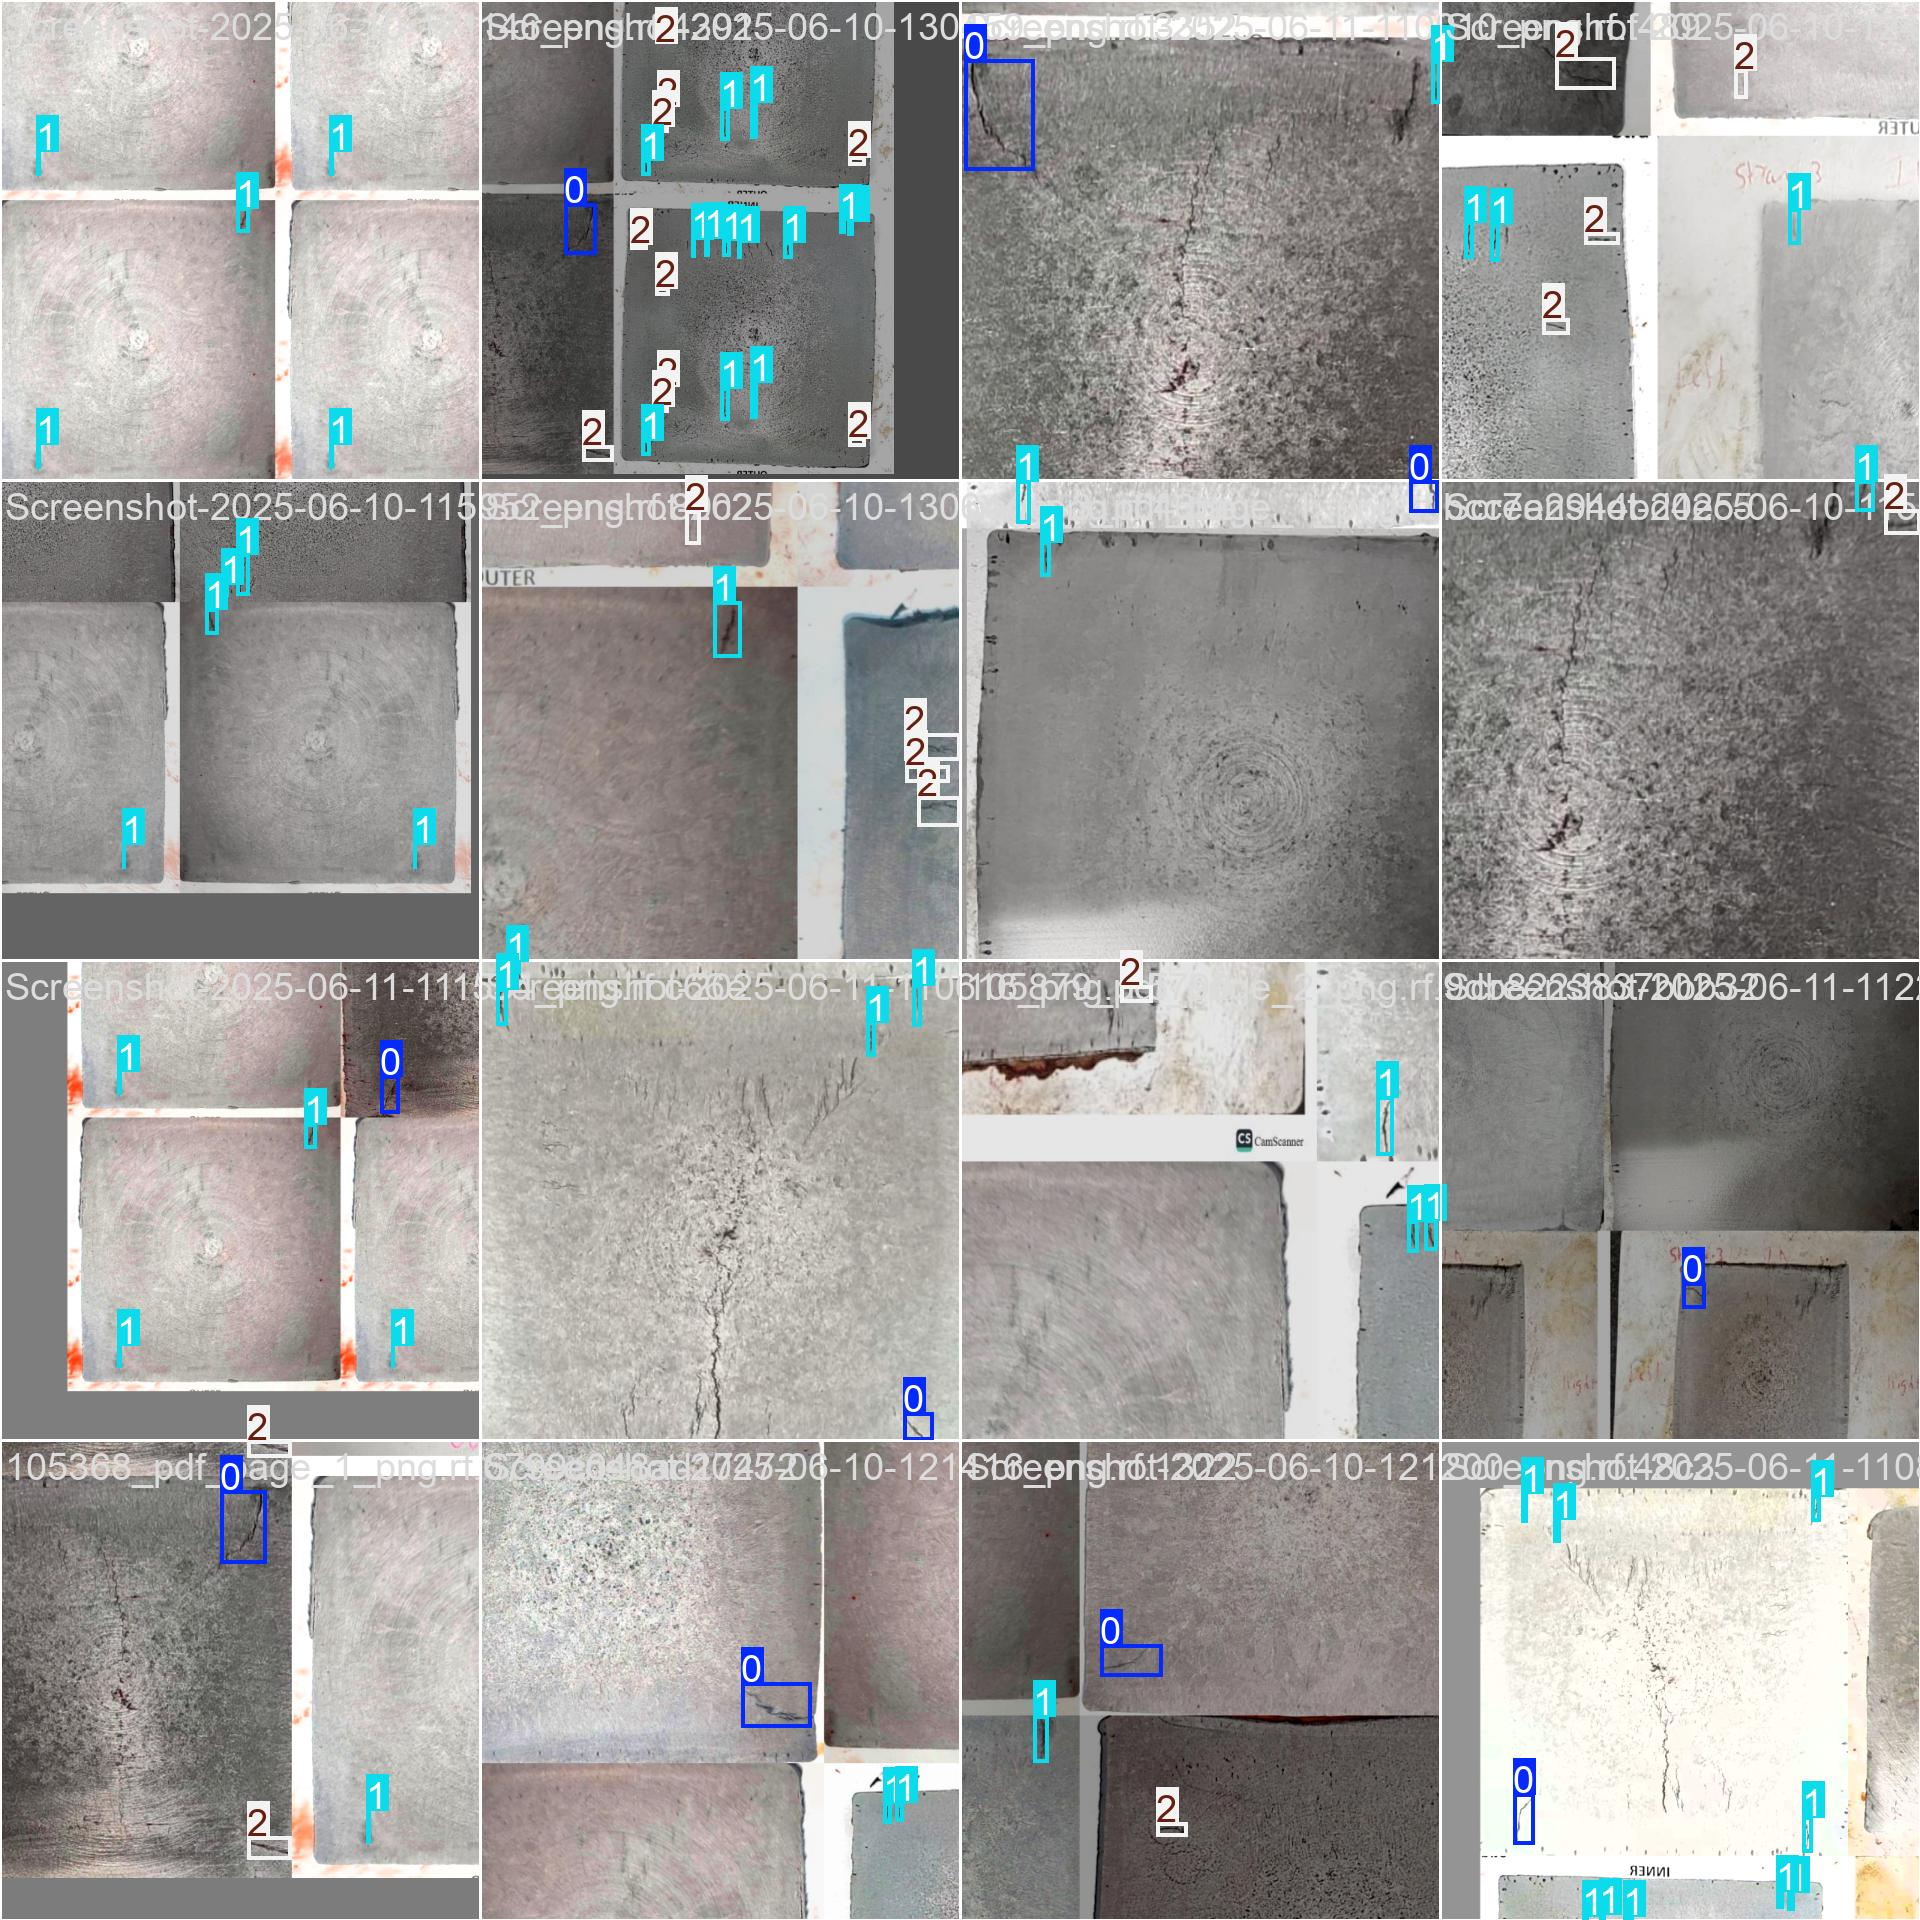

In [12]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

In [13]:
import yaml

data_yaml_path = f"{dataset.location}/data.yaml"

with open(data_yaml_path, 'r') as f:
  data_yaml = yaml.safe_load(f)

class_names = data_yaml.get('names', [])

print("Crack labels and names:")
for label, name in enumerate(class_names):
  print(f"Label {label}: {name}")

Crack labels and names:
Label 0: Diagonal Crack
Label 1: Longitudinal Crack
Label 2: Transverse Crack


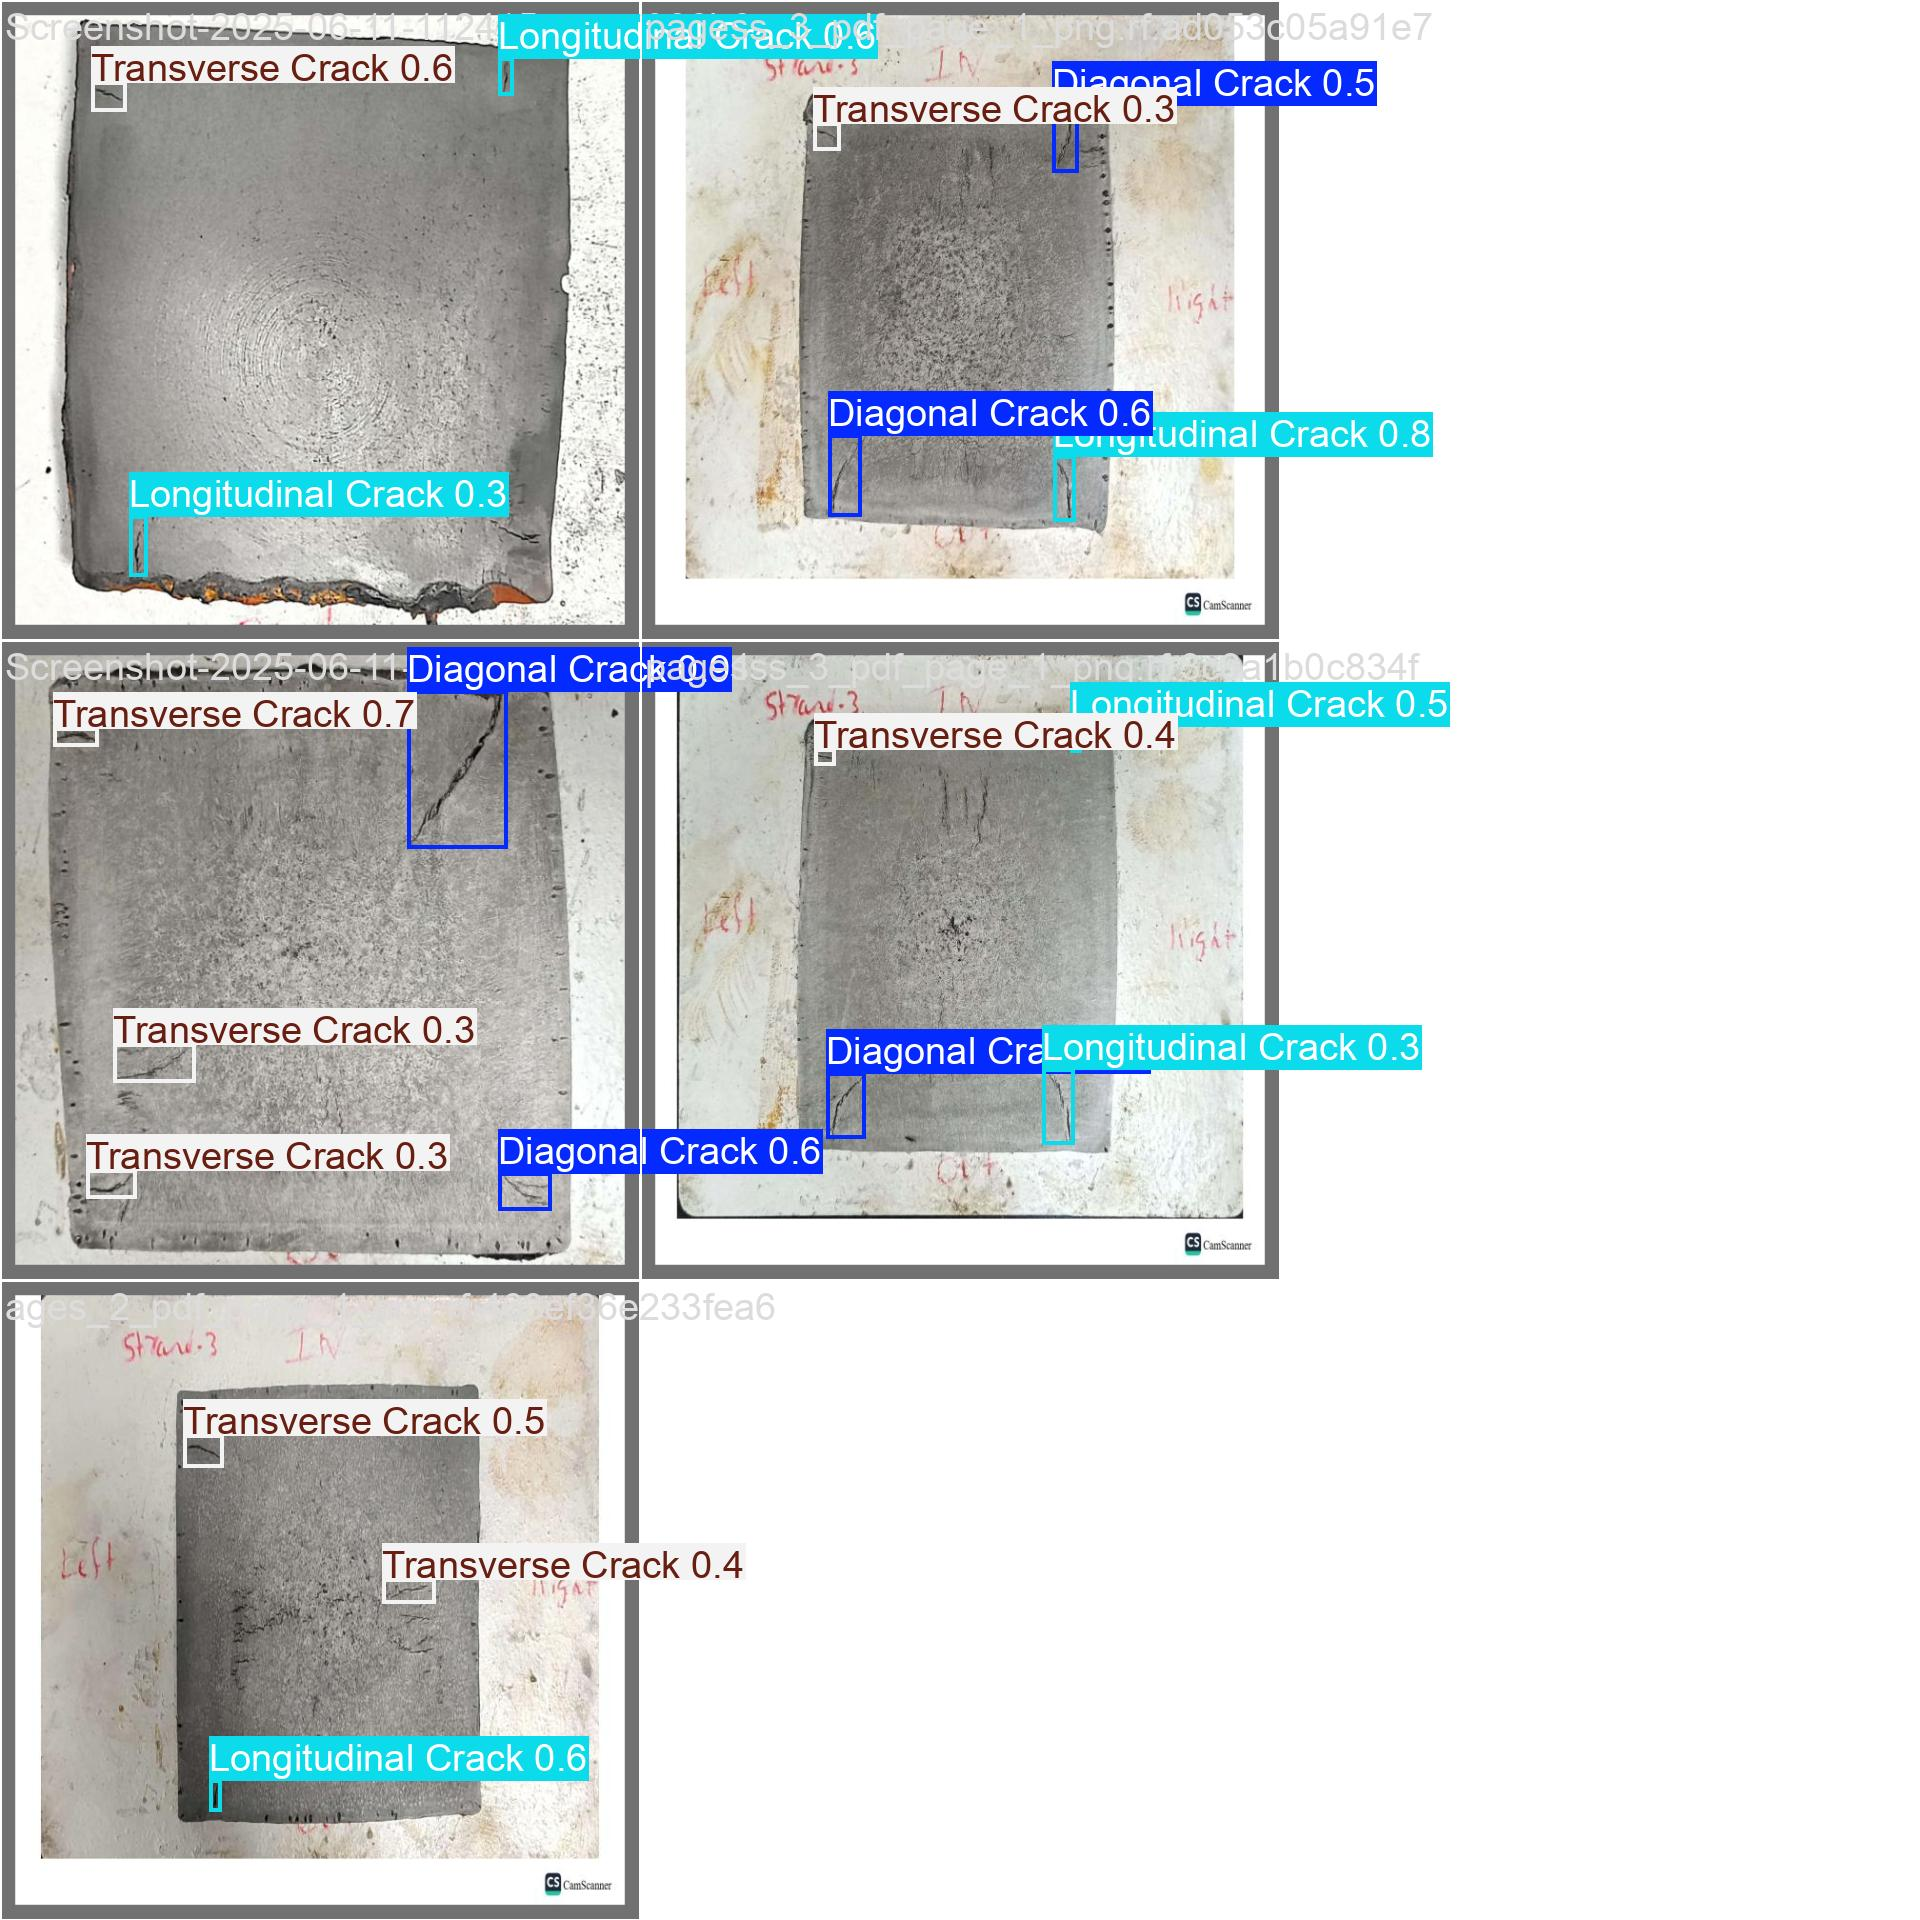

In [14]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [15]:
# Validate Fine-Tuned Model
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1809.2±1162.5 MB/s, size: 89.8 KB)
val: Scanning /content/BILLET-INSPECTION-5/valid/labels.cache... 37 images, 1 backgrounds, 0 corrupt: 100% 37/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  2.02it/s]
                   all         37        178      0.609      0.588      0.612      0.275
        Diagonal Crack         20         36      0.712      0.755      0.831      0.497
    Longitudinal Crack         30         76      0.562        0.5      0.481      0.142
      Transverse Crack         25         66      0.554      0.509      0.524      0.187
Speed: 0.3ms preprocess, 14.6ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:/

In [16]:
# Step # 08 Inference with Custom Model on Images
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/17 /content/BILLET-INSPECTION-5/test/images/105379_pdf_page_1_png.rf.476a3b20f45f4b50abf71f3feea20ef0.jpg: 640x640 1 Diagonal Crack, 1 Longitudinal Crack, 12.2ms
image 2/17 /content/BILLET-INSPECTION-5/test/images/105474_pdf_page_1_png.rf.ddbb5da16747abf5935ea7ffa6730a02.jpg: 640x640 2 Diagonal Cracks, 1 Longitudinal Crack, 1 Transverse Crack, 17.0ms
image 3/17 /content/BILLET-INSPECTION-5/test/images/105862_pdf_page_1_png.rf.6b487b19ded07b028b1a1bd4cf39b888.jpg: 640x640 1 Diagonal Crack, 3 Transverse Cracks, 15.1ms
image 4/17 /content/BILLET-INSPECTION-5/test/images/105871_pdf_page_3_png.rf.c677b2086606979880e88ee3608da90e.jpg: 640x640 2 Diagonal Cracks, 15.1ms
image 5/17 /content/BILLET-INSPECTION-5/test/images/105912_pdf_page_1_png.rf.697f215875dcf6621b1cfa314c8d5056.jpg: 640x640 1 Longitudinal Crack, 15.4ms
im

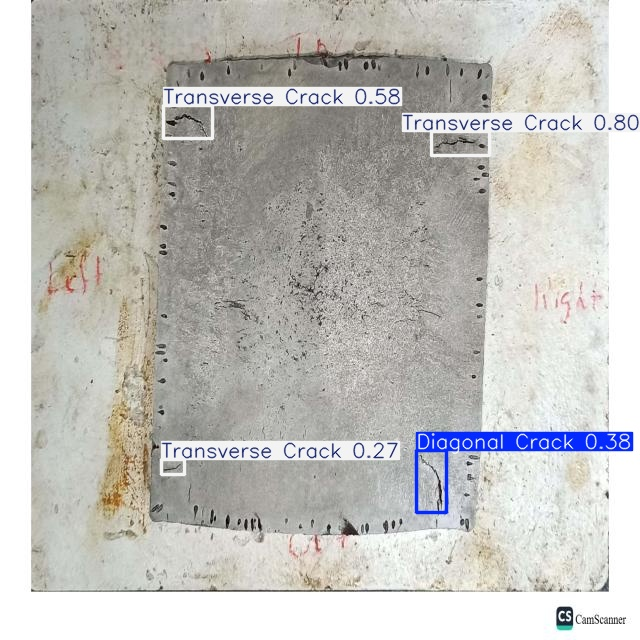

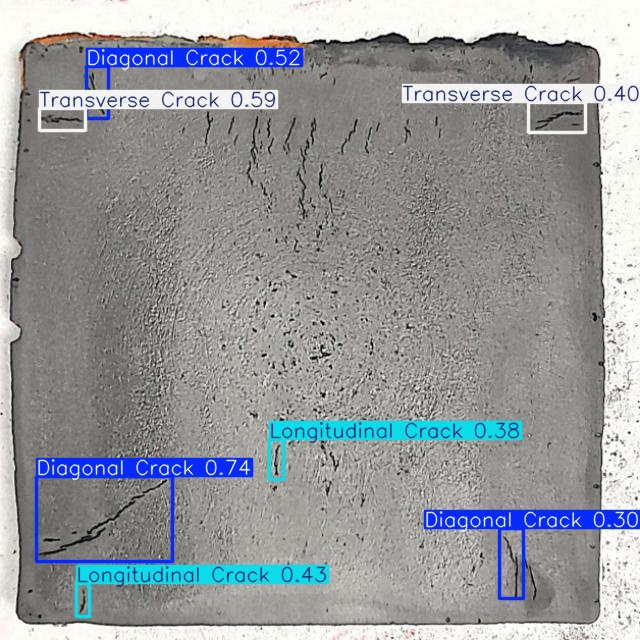

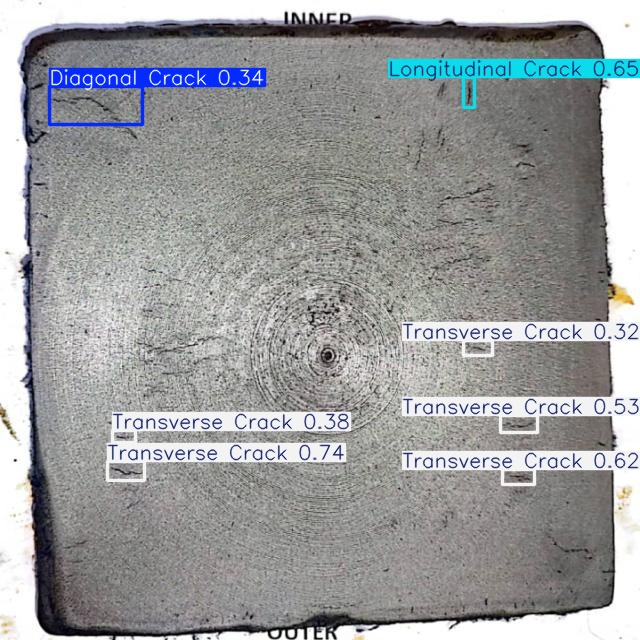

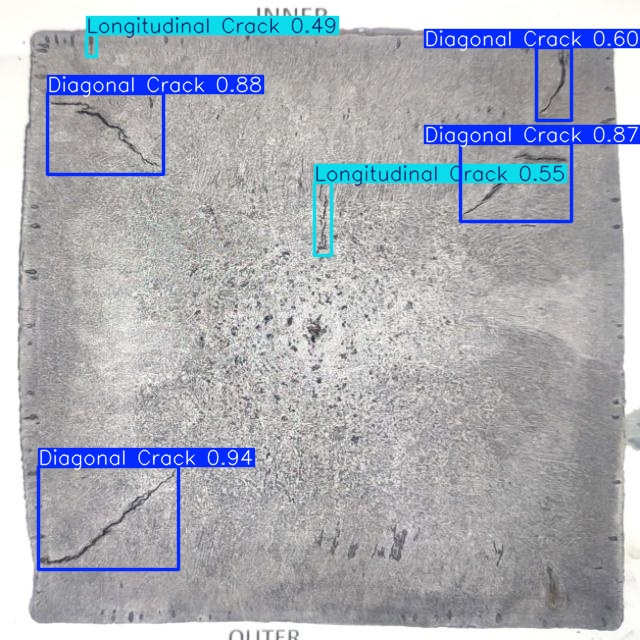

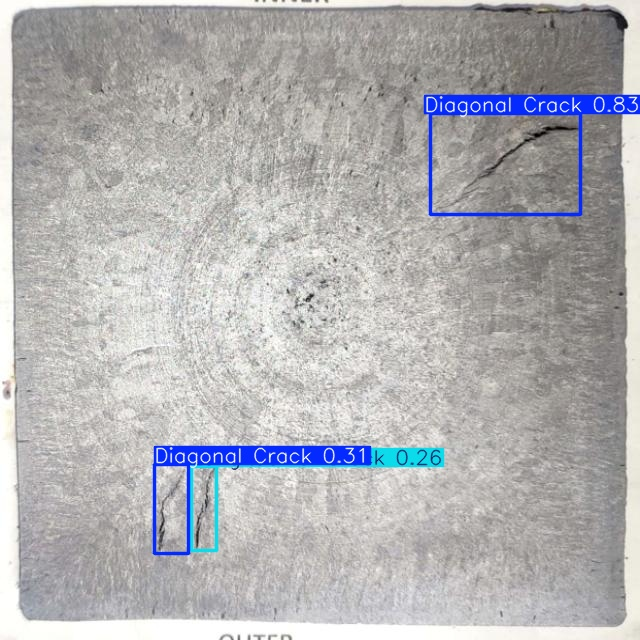

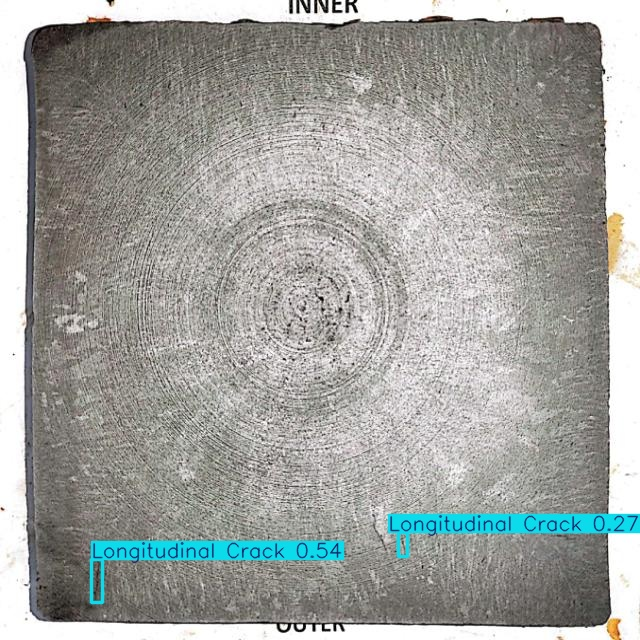

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [19]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=images.png save=True

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/images.png: 640x640 2 Diagonal Cracks, 1 Longitudinal Crack, 1 Transverse Crack, 10.9ms
Speed: 3.6ms preprocess, 10.9ms inference, 144.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [21]:
Image("/content/runs/detect/predict2/images.jpg", width=600, embed=True)

In [24]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=images2.png save=True

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/images2.png: 640x640 2 Diagonal Cracks, 2 Longitudinal Cracks, 8.8ms
Speed: 3.5ms preprocess, 8.8ms inference, 187.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


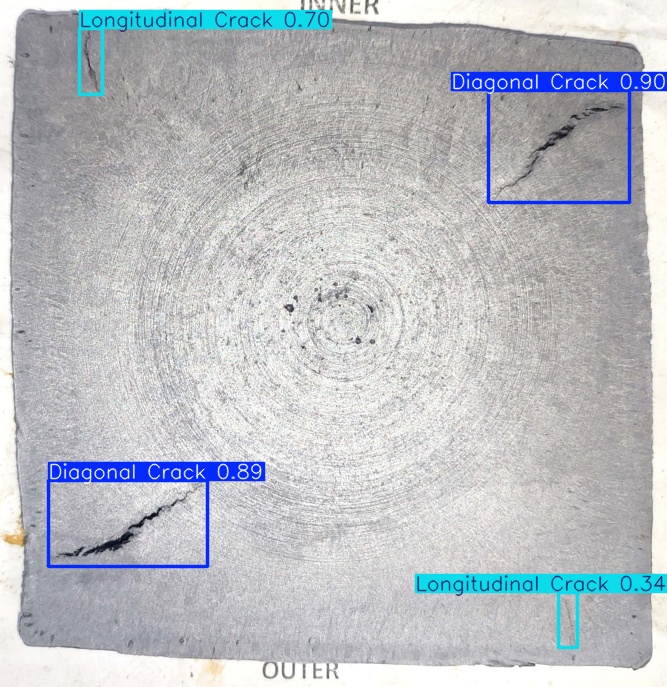

In [25]:
Image("/content/runs/detect/predict4/images2.jpg", width=600, embed=True)

In [26]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=images3.png save=True

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/images3.png: 640x640 1 Diagonal Crack, 2 Longitudinal Cracks, 2 Transverse Cracks, 8.8ms
Speed: 3.4ms preprocess, 8.8ms inference, 135.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


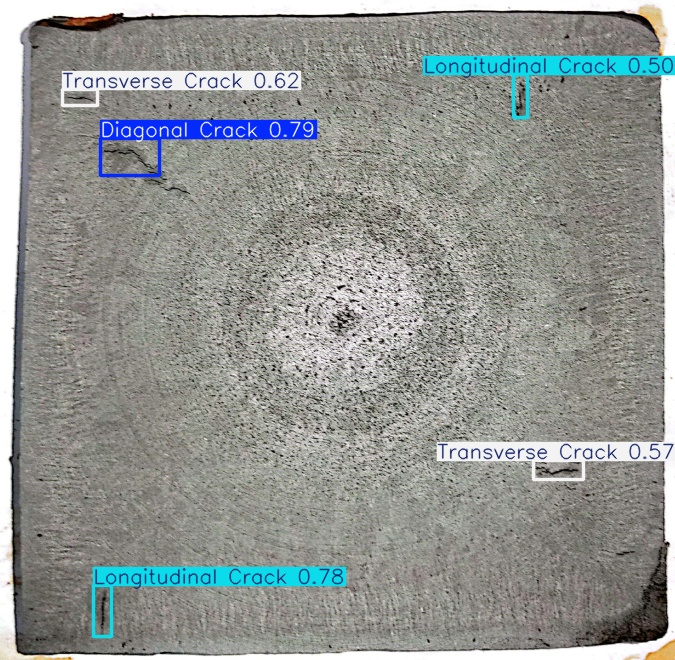

In [27]:
Image("/content/runs/detect/predict5/images3.jpg", width=600, embed=True)

## Summary:
Best performing class is Diagonal Crack, with very good precision and recall, however, Longitudinal Crack and Transverse Crack show relatively low recall.

For improvement, class-balanced augmentations is require to strengthen the model’s robustness, especially for underperforming classes.

## Yolo 8